In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sine wave 

$$f(t) = A \sin (2 \pi ft  + \phi) $$

where 

- $f(t)$ is the value of the sine wave at time $t$
- A is the amplitude of the sine wave, representing its maximum displacement from the equilibrium position,
- $f$ is the frequency of the sine wave, representing the number of oscillations per unit of time,
- $t$ is time,
- $\phi$ is the phase of the sine wave, representing the horizontal shift (or phase shift) of the waveform.

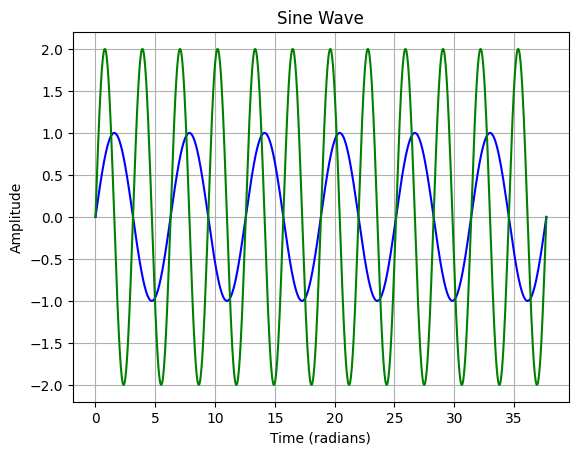

In [48]:
# Generate values for the x-axis (e.g., time)
x = np.linspace(0, 12 * np.pi, 1000)
x2 = np.linspace(0, 12 * np.pi, 1000)
# Generate the corresponding y-values using the sine function
y = np.sin(x)
y2 = 2 * np.sin(2*x2)

# Plot the sine wave
plt.plot(x, y, color = "blue")
plt.plot(x2, y2, color = "green")
plt.title('Sine Wave')
plt.xlabel('Time (radians)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [53]:
# Generate values for the x-axis (e.g., time)
t = np.linspace(0, 1, 1000, endpoint=False)

# Generate a sine wave
frequency = 5  # Choose the frequency of the sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Perform FFT
fft_result = np.fft.fft(sine_wave)
fft_freq = np.fft.fftfreq(len(t), t[1] - t[0])


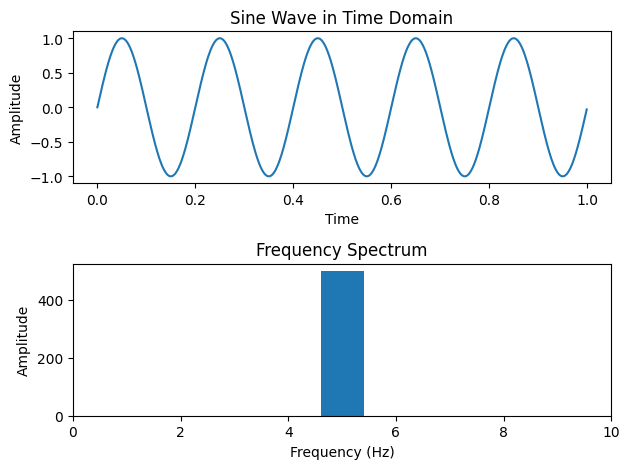

In [54]:

# Plot the original sine wave
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave)
plt.title('Sine Wave in Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the frequency spectrum
plt.subplot(2, 1, 2)
plt.bar(fft_freq, np.abs(fft_result))
plt.xlim(0, 10)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

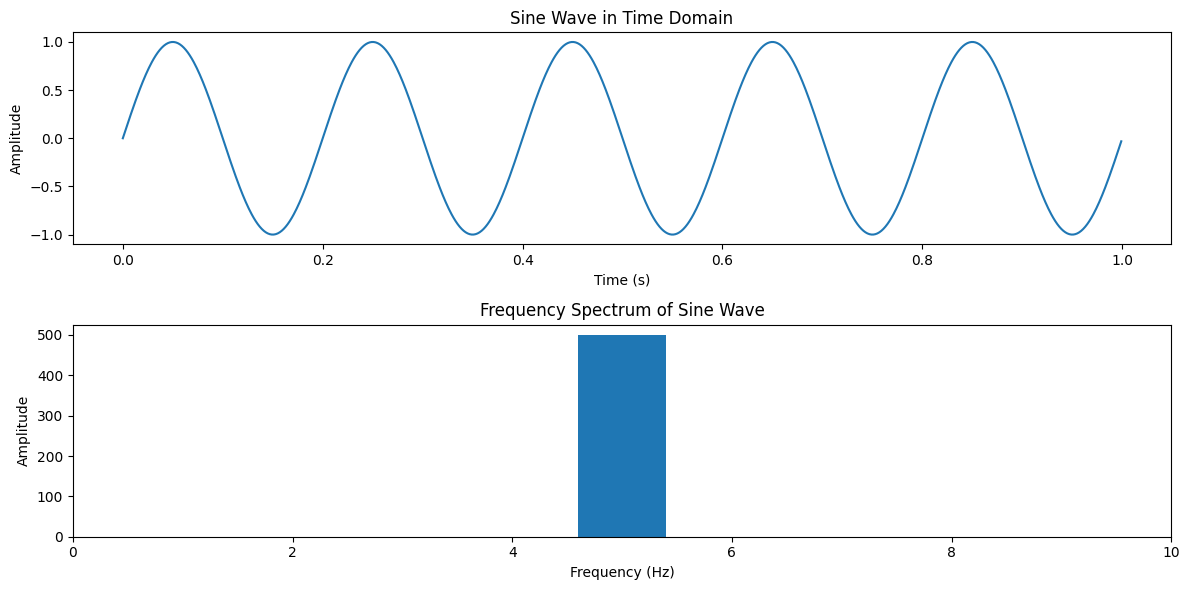

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the sine wave
frequency = 5  # Frequency of the sine wave in Hz
duration = 1  # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Compute the FFT
fft_result = np.fft.fft(sine_wave)
fft_freq = np.fft.fftfreq(len(t), 1/sampling_rate)

# Plot the time-domain and frequency-domain signals
plt.figure(figsize=(12, 6))

# Plot the time-domain signal
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave)
plt.title('Sine Wave in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the frequency-domain signal
plt.subplot(2, 1, 2)
plt.bar(fft_freq, np.abs(fft_result))
plt.title('Frequency Spectrum of Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, sampling_rate / 2)  # Show only positive frequencies
plt.xlim(0, 10)  # Show only positive frequencies
plt.tight_layout()

plt.show()


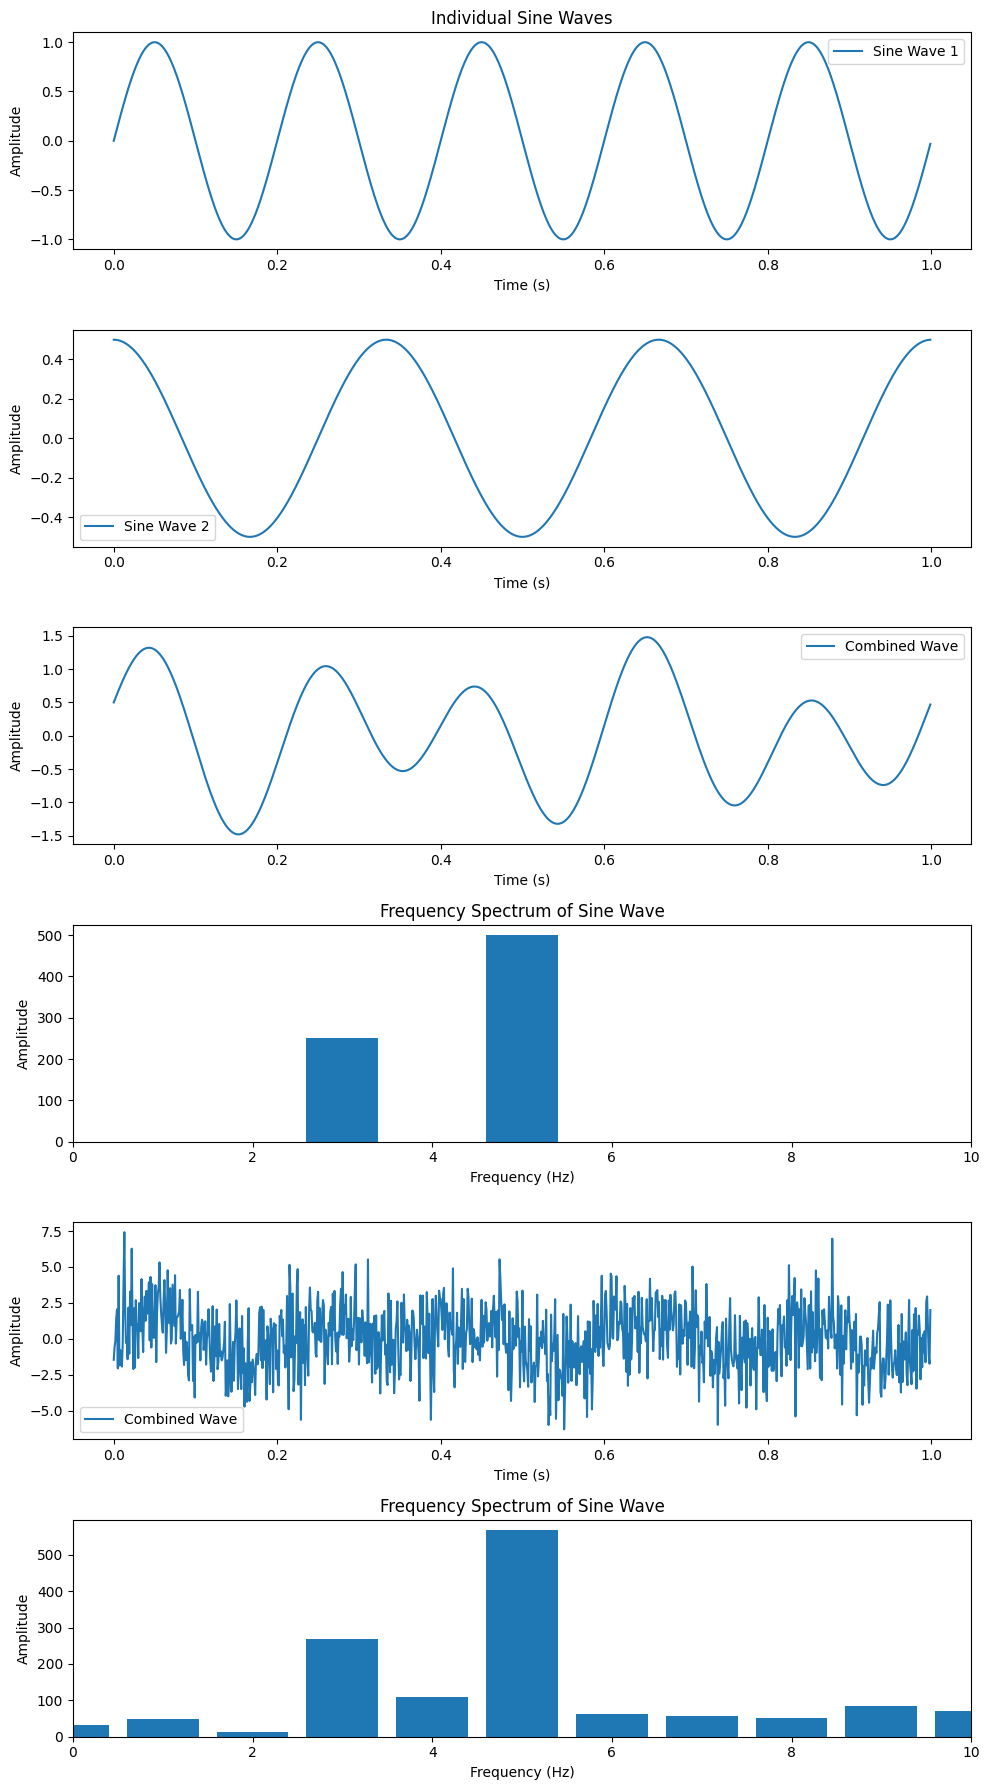

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the first sine wave
frequency1 = 5  # Frequency in Hertz
amplitude1 = 1
phase1 = 0

# Define parameters for the second sine wave
frequency2 = 3  # Frequency in Hertz
amplitude2 = 0.5
phase2 = np.pi/2  # Phase shift of pi/2 radians

# Generate time values
Fs = 1000  # Sampling frequency
T = 1 / Fs  # Sampling interval
t = np.arange(0, 1, T)  # Time vector

# Generate the individual sine waves
sine_wave1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t + phase1)
sine_wave2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t + phase2)

# Combine the sine waves by adding them together
combined_wave = sine_wave1 + sine_wave2

# Add noise to the combined sine wave
noise_amplitude = 2
noise = noise_amplitude * np.random.normal(size=len(t))
noisy_combined_wave = combined_wave + noise

fft_result = np.fft.fft(combined_wave)
fft_freq = np.fft.fftfreq(len(t), 1/Fs)

noisy_fft_result = np.fft.fft(noisy_combined_wave)

plt.figure(figsize=(10, 18))

# Plot the individual sine waves and the combined wave
plt.subplot(6, 1, 1)
plt.plot(t, sine_wave1, label='Sine Wave 1')
plt.title('Individual Sine Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(6, 1, 2)
plt.plot(t, sine_wave2, label='Sine Wave 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(6, 1, 3)
plt.plot(t, combined_wave, label='Combined Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the frequency-domain signal
plt.subplot(6, 1, 4)
plt.bar(fft_freq, np.abs(fft_result))
plt.title('Frequency Spectrum of Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
#plt.xlim(0, sampling_rate / 2)  # Show only positive frequencies
plt.xlim(0, 10)  # Show only positive frequencies

plt.subplot(6, 1, 5)
plt.plot(t, noisy_combined_wave, label='Combined Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the frequency-domain signal
plt.subplot(6, 1, 6)
plt.bar(fft_freq, np.abs(noisy_fft_result))
plt.title('Frequency Spectrum of Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
#plt.xlim(0, sampling_rate / 2)  # Show only positive frequencies
plt.xlim(0, 10)  # Show only positive frequencies


plt.tight_layout()
plt.show()


To understand Fourier transform you need to know: 
- Sine waves 
- Complex nunmbers 
- Dot product

# Discrete Fourier Transformation

DFT is a mathematical technique used in signal processing and digital signal analysis to transform a discrete signal from its time-domain representation into its frequency-domain representation. In other words, it converts a sequence of complex numbers, representing a discrete-time signal, into another sequence of complex numbers, representing the signal's frequency components.
 

$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi \frac{kn}{N}}$$

where
- $X[k]$ is the complext result of the DFT at frequency index k
- $x[n]$ is the input signal at time index n
- $N$ is the total number of samples in the input signal.
- $j$ is the imaginary unit $(j^{2} = -1)$

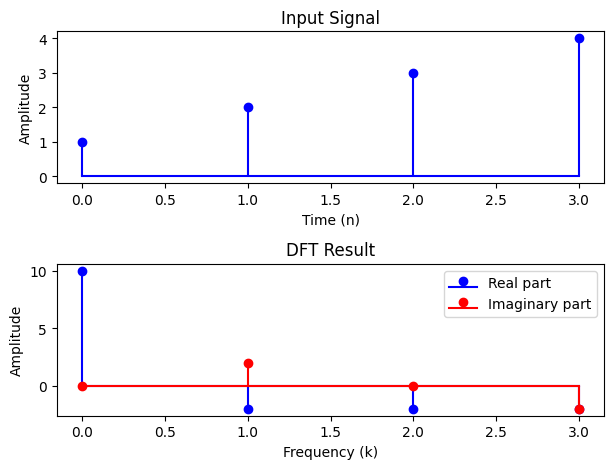

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample input signal
signal = np.array([1, 2, 3, 4])

# Compute the DFT manually using the formula
N = len(signal)
X = np.zeros(N, dtype=np.complex128)

for k in range(N):
    for n in range(N):
        X[k] += signal[n] * np.exp(-1j * 2 * np.pi * k * n / N)

# Plot the input signal
plt.subplot(2, 1, 1)
plt.stem(np.arange(N), signal, basefmt='b-', linefmt='b-', markerfmt='bo')
plt.title('Input Signal')
plt.xlabel('Time (n)')
plt.ylabel('Amplitude')

# Plot the real and imaginary parts of the DFT result
plt.subplot(2, 1, 2)
plt.stem(np.arange(N), np.real(X), basefmt='b-', linefmt='b-', markerfmt='bo', label='Real part')
plt.stem(np.arange(N), np.imag(X), basefmt='r-', linefmt='r-', markerfmt='ro', label='Imaginary part')
plt.title('DFT Result')
plt.xlabel('Frequency (k)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# Welch method

The Welch method is a technique used for estimating the power spectral density (PSD) of a signal. It is a modification of the periodogram method designed to reduce the variance of the spectral estimate by averaging multiple periodograms.

The basic idea behind the Welch method is to divide the signal into overlapping segments, compute the periodogram for each segment (which is essentially the squared magnitude of the Discrete Fourier Transform of the segment), and then average these periodograms. The averaging helps in reducing the variance of the spectral estimate, providing a smoother and more reliable representation of the signal's frequency content.

The formula for the Welch method can be expressed as follows:

$$P_{\text{Welch}}(f) = \frac{1}{M} \sum_{m=0}^{M-1} |X_m(f)|^2
$$

where: 
- $P_{Welch}(f)$ represents the Welch estimate of the power spectral density at frequency $f$
- M is the number of segments,
- $X_{m}(f)$ is the DFT of the $m$-th segment 


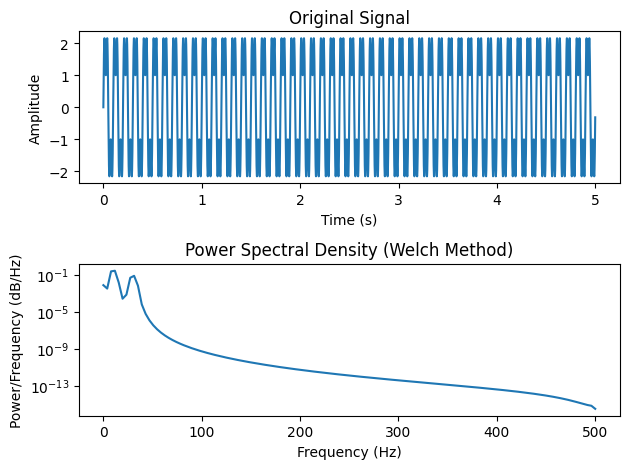

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Generate a signal with two sine waves
fs = 1000  # Sampling frequency in Hz
t = np.arange(0, 5, 1/fs)  # Time vector
signal = 2 * np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 30 * t)

# Apply Welch method
frequencies, psd = welch(signal, fs=fs, nperseg=256, noverlap=128)

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the power spectral density estimate using Welch method
plt.subplot(2, 1, 2)
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (Welch Method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')

plt.tight_layout()
plt.show()
